In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Regression

### Load dataset

In [ ]:
# dat_dir = './'

github_url = 'https://raw.githubusercontent.com/huangyh09/foundation-data-science/'
dat_dir = github_url + 'main/assignments/'

df_reg = pd.read_csv(dat_dir + "real_estate.csv", index_col=0)

In [ ]:
df_reg

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [ ]:
X = df_reg[df_reg.columns[:-1]]
y = df_reg[df_reg.columns[-1]]

### Q1(a): $R^2$ and non-significant features $p>0.05$

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
print('R^2:', result.rsquared)

R^2: 0.5823704472722951


In [ ]:
print(result.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     94.59
Date:                        Wed, 24 Nov 2021   Prob (F-statistic):           4.86e-74
Time:                                16:36:16   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

At the significance level of $0.05$, we can see that the p-value of the t-statistic for "X6 longitude" is 0.798, which is much greater than 0.05. This predictor has a non-significant feature and does not have a coefficient significantly far from 0. 

### Q1(b): Prediction on training set and Pearson's $R^2$

In [ ]:
from scipy import stats

In [ ]:
y_pred = result.predict(X)
print("Pearson's correlation coefficient between predicted and observed y:", stats.pearsonr(y_pred, y)[0])

Pearson's correlation coefficient between predicted and observed y: 0.7631319985902143


In [ ]:
print("Pearson's R-squared:", stats.pearsonr(y_pred, y)[0]**2)
print("SSE-based R-squared:", result.rsquared)

Pearson's R-squared: 0.5823704472722948
SSE-based R-squared: 0.5823704472722951


In [ ]:
print("(Absolute) Difference between Pearson's R-squared and SSE-based R-squared:", result.rsquared - stats.pearsonr(y_pred, y)[0]**2)

(Absolute) Difference between Pearson's R-squared and SSE-based R-squared: 3.3306690738754696e-16


Although the calculated values of Pearson's $R^2$ and SSE-based $R^2$ are nearly the same, they have slight differences by definition. \
Pearson's $R^2$ is simply the squared value of the correlation coefficient. Its range is $[0, 1]$. \
The SSE-based $R^2$ measures the percentage of the variance of the dependent variable that can be explained by the independent variables in the multiple regression model. \
In some extreme cases where the regression model is bad, the value of the SSE-based $R^2$ can go below 0.

### Q1(c): cross-validation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

In [ ]:
model2 = LinearRegression().fit(X, y)
y_pred_2 = cross_val_predict(model2, X, y, cv=5)

In [ ]:
print("Pearson's R-squared:", stats.pearsonr(y_pred_2, y)[0]**2)

Pearson's R-squared: 0.5756276803394937


### Q1(d): plot observed and predicted y

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


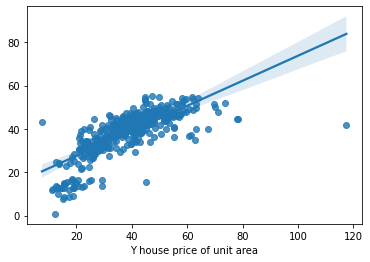

In [ ]:
sns.regplot(y, y_pred_2)

### Q1(e): non-linear transformation

We first visualize the pair plots between each variable. 

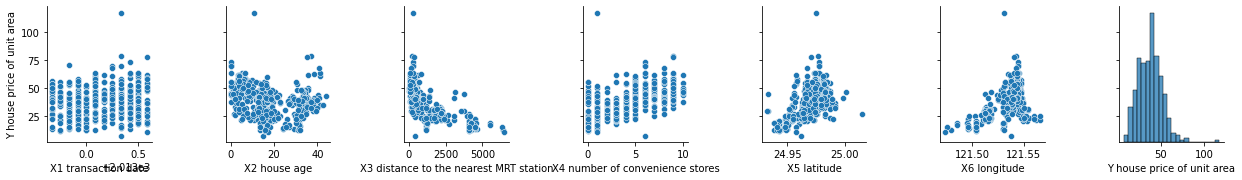

In [ ]:
sns.pairplot(df_reg, y_vars="Y house price of unit area") 

From the pairplots above, it is suggested that X3 has an exponential-like relationship with Y. Thus, we apply a log-transformation to the variable X3. 

In [ ]:
log_X3 = np.log(df_reg['X3 distance to the nearest MRT station'])
log_X3

No
1      4.441225
2      5.725527
3      6.331474
4      6.331474
5      5.967603
         ...   
410    8.314346
411    4.504864
412    5.968630
413    4.652150
414    4.504864
Name: X3 distance to the nearest MRT station, Length: 414, dtype: float64

In [ ]:
df_reg.insert(3, "log X3", log_X3)
df_reg

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,log X3,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,,
1,2012.917,32.0,84.87882,4.441225,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,5.725527,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,6.331474,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,6.331474,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5.967603,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,8.314346,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,4.504864,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,5.968630,7,24.97923,121.53986,40.6


After applying the log-transformation, the visualized relationship between log(X3) and Y is shown below: 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


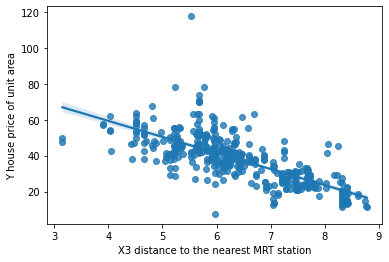

In [ ]:
sns.regplot(log_X3, y)

We now re-fit the regression model and perform the same procedures as above: 

In [ ]:
X = df_reg[df_reg.columns[:2] | df_reg.columns[3:-1]]
y = df_reg[df_reg.columns[-1]]
X

,X1 transaction date,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,log X3
No,,,,,,
1,2012.917,32.0,10,24.98298,121.54024,4.441225
2,2012.917,19.5,9,24.98034,121.53951,5.725527
3,2013.583,13.3,5,24.98746,121.54391,6.331474
4,2013.500,13.3,5,24.98746,121.54391,6.331474
5,2012.833,5.0,5,24.97937,121.54245,5.967603
...,...,...,...,...,...,...
410,2013.000,13.7,0,24.94155,121.50381,8.314346
411,2012.667,5.6,9,24.97433,121.54310,4.504864
412,2013.250,18.8,7,24.97923,121.53986,5.968630


In [ ]:
model3 = LinearRegression().fit(X, y)
y_pred_3 = cross_val_predict(model3, X, y, cv=5)

In [ ]:
print("Pearson's R-squared:", stats.pearsonr(y_pred_3, y)[0]**2)

Pearson's R-squared: 0.6465260673145529


## 2. Classification

### Load dataset

In [ ]:
# dat_dir = './'

github_url = 'https://raw.githubusercontent.com/huangyh09/foundation-data-science/'
dat_dir = github_url + 'main/assignments/'

df_clf = pd.read_csv(dat_dir + "stroke_data.csv", index_col=0)

In [ ]:
df_clf

,is_female,age,hypertension,heart_disease,ever_married,Rural_residence,avg_glucose_level,bmi,smoking,stroke
id,,,,,,,,,,
24201,0,33.0,0,0,1,1,93.80,23.9,0,0
70031,1,71.0,1,0,1,1,195.25,33.3,0,0
17013,0,78.0,1,0,0,0,113.01,24.0,0,1
67890,0,77.0,0,1,1,0,102.96,20.9,0,0
38078,1,82.0,1,1,1,0,73.19,33.5,0,0
...,...,...,...,...,...,...,...,...,...,...
20890,1,61.0,0,0,1,1,79.89,24.5,1,0
3553,1,43.0,0,0,1,0,104.55,23.9,1,0
72337,1,55.0,0,0,1,0,231.76,42.9,0,0


In [ ]:
X = df_clf[df_clf.columns[:-1]]
y = df_clf[df_clf.columns[-1]]

### Q2(a): Model fitting and log likelihood

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)
log_model = sm.Logit(y, X)

In [ ]:
res_log = log_model.fit()
print(res_log.summary())

Optimization terminated successfully.
         Current function value: 0.364640
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                  980
Model:                          Logit   Df Residuals:                      970
Method:                           MLE   Df Model:                            9
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.2354
Time:                        11:33:38   Log-Likelihood:                -357.35
converged:                       True   LL-Null:                       -467.38
Covariance Type:            nonrobust   LLR p-value:                 2.028e-42
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.8913      0.756     -9.112      0.000      -8.374      -5.409
is_femal

According to the regression model summary, the log-likelihood is -357.35.

### Q2(b): Remove non-significant features & new log likelihood

Under the significance level of $\alpha=0.05$, we can see that the following variables have p-values larger than $0.05$ and thus should be removed: \
* is_female
* hypertension
* heart_disease
* ever_married
* Rural_residence
* bmi


In [ ]:
items_to_be_dropped = ['is_female', 'hypertension', 'heart_disease', 'ever_married', 'Rural_residence', 'bmi']
X2 = X.drop(items_to_be_dropped, axis=1)
X2

,const,age,avg_glucose_level,smoking
id,,,,
24201,1.0,33.0,93.80,0
70031,1.0,71.0,195.25,0
17013,1.0,78.0,113.01,0
67890,1.0,77.0,102.96,0
38078,1.0,82.0,73.19,0
...,...,...,...,...
20890,1.0,61.0,79.89,1
3553,1.0,43.0,104.55,1
72337,1.0,55.0,231.76,0


In [ ]:
log_model_2 = sm.Logit(y, X2)
res_log_2 = log_model_2.fit()
print(res_log_2.summary())

Optimization terminated successfully.
         Current function value: 0.368103
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                  980
Model:                          Logit   Df Residuals:                      976
Method:                           MLE   Df Model:                            3
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.2282
Time:                        11:33:38   Log-Likelihood:                -360.74
converged:                       True   LL-Null:                       -467.38
Covariance Type:            nonrobust   LLR p-value:                 5.698e-46
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.7938      0.511    -13.307      0.000      -7.794      -5.793
age     

According to the regression model summary, the log-likelihood is -360.74 after removing the high p-value features.

### Q2(c): Cross-validation & accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [ ]:
def binary(y):
  lis = []
  for i in y:
    if i[0]>i[1]:
      lis.append(0)
    else:
      lis.append(1)
  return lis

In [ ]:
clf = LogisticRegression(max_iter=800).fit(X, y)
y_pred_proba_cv = cross_val_predict(clf, X, y, cv=5, method='predict_proba')

In [ ]:
print(f'Accuracy with full features: {accuracy_score(y.tolist(), binary(y_pred_proba_cv))*100}%')

Accuracy with full features: 81.12244897959184%


In [ ]:
clf2 = LogisticRegression(max_iter=800).fit(X2, y)
y_pred_proba_cv_2 = cross_val_predict(clf2, X2, y, cv=5, method='predict_proba')
print(f'Accuracy with filtered features: {accuracy_score(y.tolist(), binary(y_pred_proba_cv_2))*100}%')

Accuracy with filtered features: 80.81632653061224%


### Q2(d): ROC curve and AUC

In [ ]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


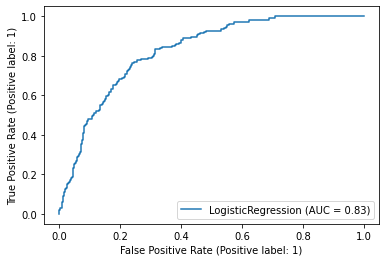

In [ ]:
plot_roc_curve(clf2, X2, y)

### Q2(e): plot ROC curve and set threshold to control FPR

In [ ]:
P_hat_prob_cv = y_pred_proba_cv_2[:, 1]
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y, P_hat_prob_cv)

In [ ]:
idx = np.argmin(np.abs(fpr_cv - 0.05))
#print(idx)

In [ ]:
print('Threshold to be used:', thresholds_cv[idx])

Threshold to be used: 0.5086091133219871


In [ ]:
print('Corresponding TPR:', tpr_cv[idx])

Corresponding TPR: 0.17777777777777778
